# Analysis of Loan Prediction

### Content
* Introduction: Loan Prediction
* Data description
* Formulation of reaserch question 
* Data preparation: cleaning and shaping
* Exploratory Data Analysis (EDA) and Data visualization
* Conclusion 

## 1. Introduction: Loan Prediction

Loan prediction is a very common real problem that every retail bank faces at least once in its life. If done correctly, it can save many man-hours at the end of the retail bank.
Distribution of the loans is the core business part of almost every banks. The main portion the bank’s assets is directly came from the profit earned from the loans distributed by the banks. The prime objective in banking environment is to invest their assets in safe hands where it is. Today many banks/financial companies
approves loan after a regress process of verification and validation but still there is no surety whether the chosen applicant is the deserving right applicant out of all applicants. Through this system we can predict whether that particular applicant is safe or not and the whole process of validation of features is automated by machine learning technique. The disadvantage of this model is that it emphasize different weights to each factor but in real life sometime loan can be approved on the basis of single strong factor only, which is not possible through this system. 
Loan Prediction is very helpful for employee of banks as well as for the applicant also.

Source(http://www.iosrjournals.org/iosr-jce/papers/Vol18-issue3/Version-1/O1803017981.pdf)



## 2. Data description

Understanding the problem statement is the first and main step. It will help you to give intuition to what you will encounter early. Let's take a look at the problem statement :

Dream Housing Finance company deals with all housing loans. They are present in all urban, semiurban and rural areas. The client first applies for a housing loan after the company confirms the right of the client to receive the loan. The company wants to automate the process of confirming the right to receive the loan (in real time), based on the details of the client provided when filling out the online application. These details include gender, marital status, education, number of dependants, income, loan amount, credit history and others. To automate this process, they faced the problem of determining the segments of clients eligible for a loan, so that they could work with these clients in a targeted manner.

Given below is the description for each variable.

* Variable - Description
* Loan_ID - Unique Loan ID
* Gender - Male/ Female
* Married - Applicant married (Y/N)
* Dependents - Number of dependents
* Education - Applicant Education (Graduate/ Under Graduate)
* Self_Employed - Self employed (Y/N)
* ApplicantIncome - Applicant income
* CoapplicantIncome - Coapplicant income
* LoanAmount - Loan amount in thousands
* Loan_Amount_Term - Term of loan in months
* Credit_History - credit history meets guidelines
* Property_Area - Urban/ Semi Urban/ Rural
* Loan_Status - Loan approved (Y/N)

## 3. Formulation of reaserch question

The next step is to look at the data we’re working with. Realistically, most of the data we will get, even from the government, can have errors, and it’s important to identify these errors before spending time analyzing the data. Normally, we must answer the following questions:

* Why Data Types are important and what kind of data types are used?
* Who is the most applicants in the dataset?
* Will the gender of the applicant affect the chances of approval?
* We found some mistakes in analyze the Coapplicant income and loan amount, what was the solution?
* What were the most correlated variables?

## 4. Data Preperation: Cleaning and Shaping

Data pre-processing or data preperation is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data pre-processing is a method of resolving such issues.

In [2]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the training dataset in a dataframe using Pandas
train = pd.read_csv("datasets_15953_21070_train_u6lujuX_CVtuZ9i (1).csv")

In [3]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# show the shape of the dataset i.e. no of rows, no of columns
train.shape

(614, 13)

In [5]:
# take a look at the features (i.e. independent variables) in the dataset
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# show the data types for each column of the train set
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# concise summary of the dataset, info about index dtype, column dtypes, non-null values and memory usage
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Q1: Why Data Types are important and what kind of data types are used ?
Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of analysis.

##### There are 3 data types in the data

* object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
* int64: It represents the integer variables. ApplicantIncome is of this format.
* float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

### Missing value imputation

Let’s list out feature-wise count of missing values.

In [8]:
# check for missing values
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features. We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features. If an independent variable in our dataset has huge amount of missing data e.g. 80% missing values in it, then we would drop the variable from the dataset.

In [9]:
# replace missing values with the mode
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [10]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [11]:
# replace missing value with the mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [12]:
# replace missing values with the median value due to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [13]:
# check whether all the missing values are filled in the Train dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the Train dataset.

We will change the 3+ in dependents variable to 3 to make it a numerical variable. We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [14]:
# replacing 3+ in Dependents variable with 3 for train set
train['Dependents'].replace('3+', 3, inplace=True)

In [15]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

In [16]:
# check the dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


## 5. Exploratory Data Analysis (EDA) and Data visualization

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

In [17]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [18]:
# percentage distribution can be calculated by setting the normalize=True to show proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

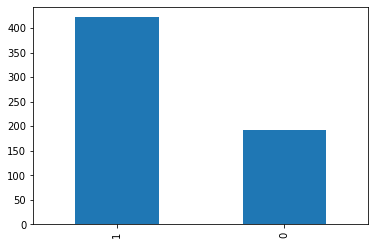

In [19]:
# bar plot to visualize the frequency
train['Loan_Status'].value_counts().plot.bar()

There are 5 features that are categorical or binary (Gender, Married, Self_Employed, Credit_History, Education)

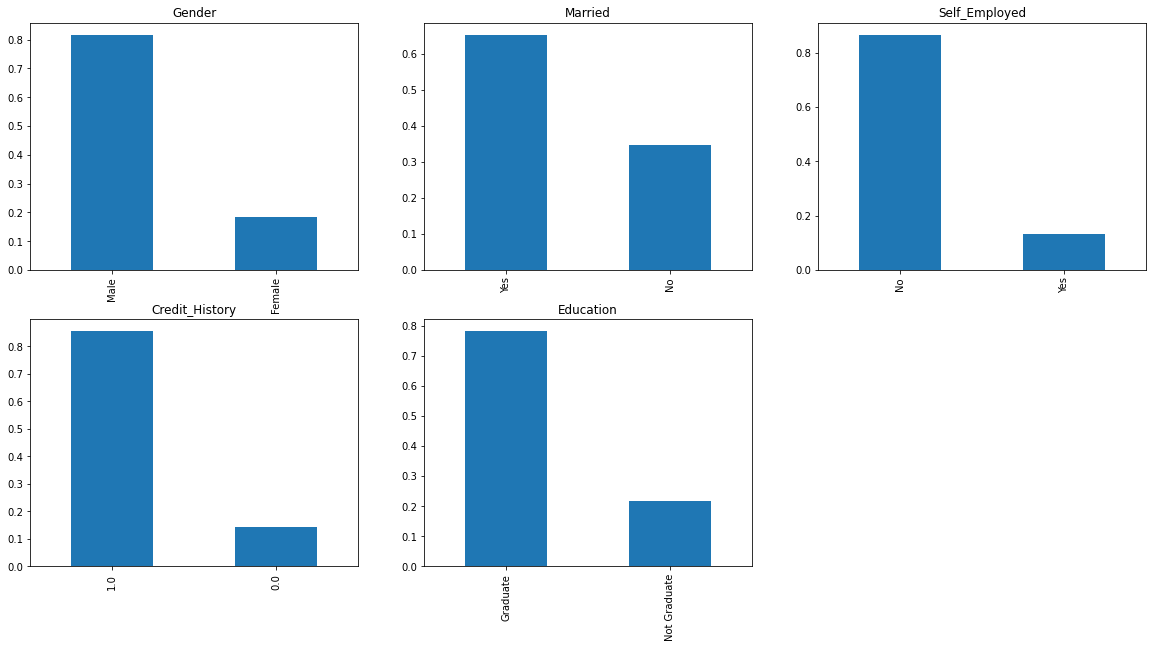

In [20]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

### Q2: Who is the most applicants in the dataset?

It can be inferred from the above bar plots that:

* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have credit history (repaid their debts).
* Around 80% of the applicants are Graduate.

There are 2 features that are Ordinal: Variables in categorical features having some order involved (Dependents, Property_Area)

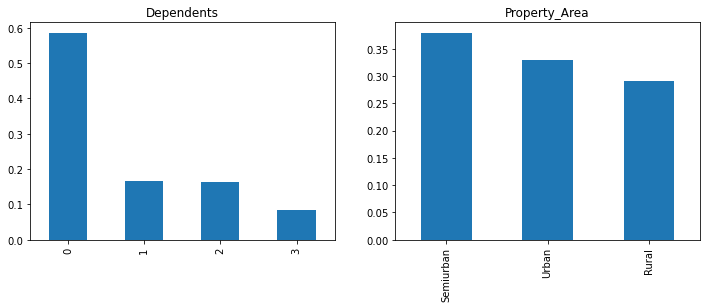

In [21]:
# Visualizing remaining categorical features
# plt.figure(1)
plt.subplot(121)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following inferences can be made from the above bar plots:

* More than half of the applicants don’t have any dependents.
* Most of the applicants are from Semiurban area.

There are 4 features that are Numerical: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Firstly, let’s look at the Applicant income distribution:

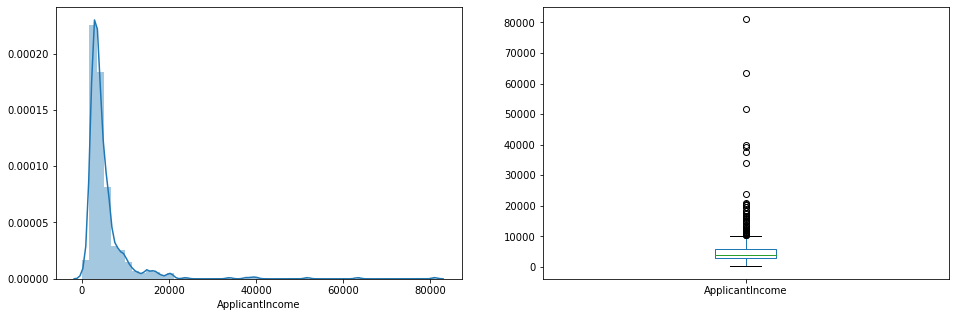

In [22]:
# Visualizing ApplicantIncome
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. The distribution is right-skewed (positive skewness). We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

Text(0.5, 0.98, '')

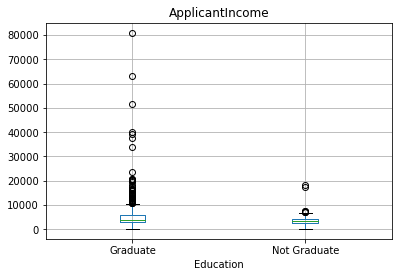

In [23]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Secondly, Let’s look at the Coapplicant income distribution.

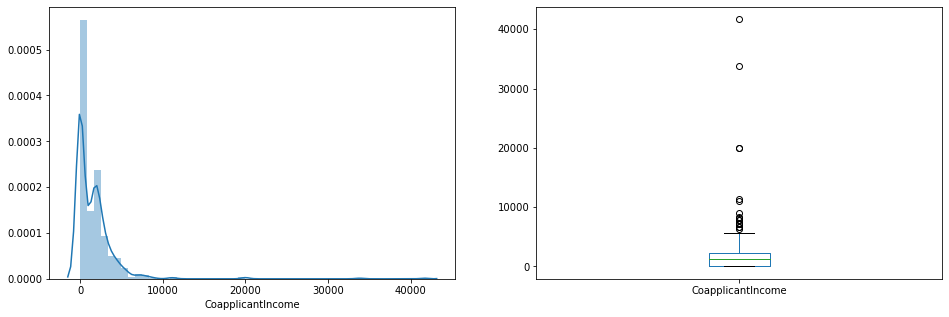

In [24]:
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Thirdly, let’s look at the distribution of LoanAmount variable.

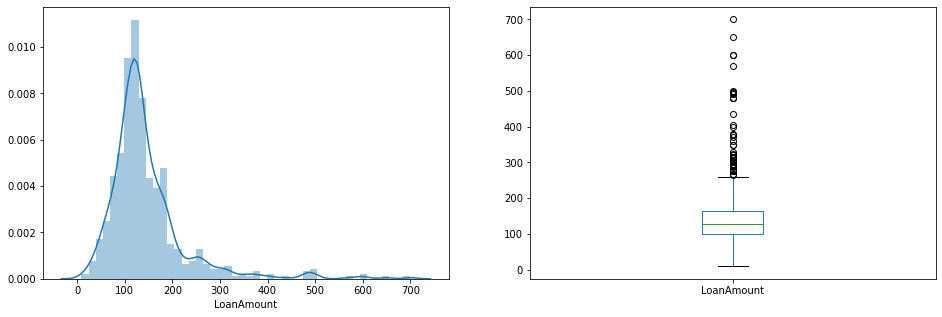

In [25]:
# plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a fairly normal distribution (albeit still slightly right-skewed) for LoanAmount but there are lot of outliers in this variable. We will treat the outliers in later sections.

Lastly, let’s look at the distribution of Loan_Amount_Term variable. Since Loan_Amount_Term is a discrete variable, we will use frequency table and bar plots which will calculate the number of each category.

In [26]:
# frequency table of a variable will give us the count of each category in that variable
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

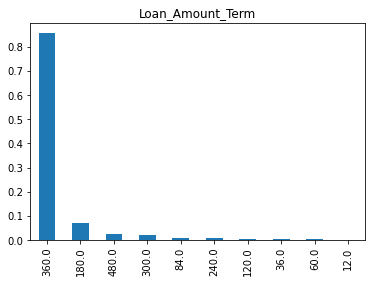

In [27]:
train['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

It can be inferred from the above bar plot that:

* Around 85% of the loans are 360 months term or 30 years period

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable in bivariate analysis. 

#####  Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans. For example, we want to see whether an applicant's gender will have any effect on approval chances.

Loan_Status    0    1
Gender               
Female        37   75
Male         155  347


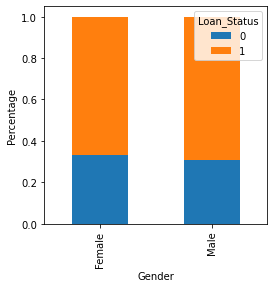

In [28]:
print(pd.crosstab(train['Gender'],train['Loan_Status']))

Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    0    1
Married              
No            79  134
Yes          113  288


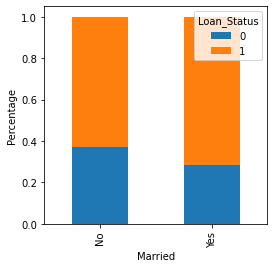

In [29]:
print(pd.crosstab(train['Married'],train['Loan_Status']))

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    0    1
Dependents           
3             18   33
0            113  247
1             36   66
2             25   76


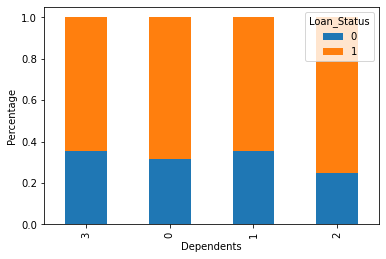

In [30]:
print(pd.crosstab(train['Dependents'],train['Loan_Status']))

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     0    1
Education             
Graduate      140  340
Not Graduate   52   82


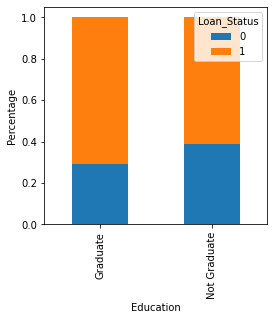

In [31]:
print(pd.crosstab(train['Education'],train['Loan_Status']))

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      0    1
Self_Employed          
No             166  366
Yes             26   56


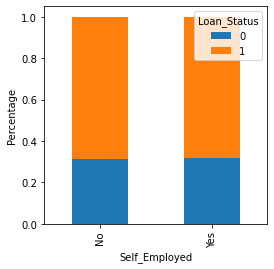

In [32]:
print(pd.crosstab(train['Self_Employed'],train['Loan_Status']))

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status       0    1
Credit_History          
0.0              82    7
1.0             110  415


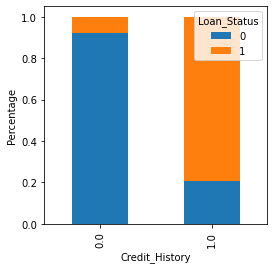

In [33]:
print(pd.crosstab(train['Credit_History'],train['Loan_Status']))

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     0    1
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


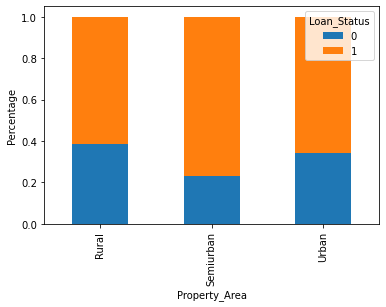

In [34]:
print(pd.crosstab(train['Property_Area'],train['Loan_Status']))

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

### Q3:  Will the gender of the applicant affect the chances of approval?

From the bar charts above, it can be inferred that:

* proportion of male and female applicants is more or less same for both approved and unapproved loans
* proportion of married applicants is higher for the approved loans
* distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status
* there is nothing significant we can infer from Self_Employed vs Loan_Status plot.
* proportion of loans getting approved for graduates is higher compared to non-graduates
* it seems people with credit history as 1 are more likely to get their loans approved
* proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

##### Numerical Independent Variable vs Target Variable

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Loan_Status
0    5446.078125
1    5384.068720
Name: ApplicantIncome, dtype: float64


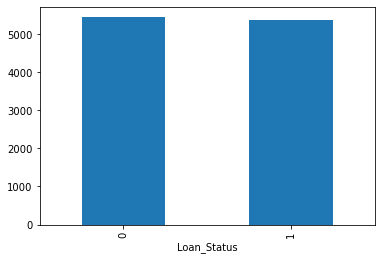

In [35]:
print(train.groupby('Loan_Status')['ApplicantIncome'].mean())

train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any significant difference in the mean income between those approval and not approved applicant (5384 vs 5446).

So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [36]:
# making bins for applicant income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [37]:
# take a look at the train set
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1,Low
7,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0,Average
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1,High
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0,Very high


Loan_Status   0    1
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


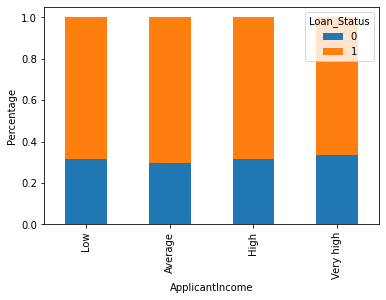

In [38]:
print(pd.crosstab(train['Income_bin'],train['Loan_Status']))

Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the Coapplicant income and loan amount variable in similar manner.

In [39]:
# making bins for Coapplicant income variable
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

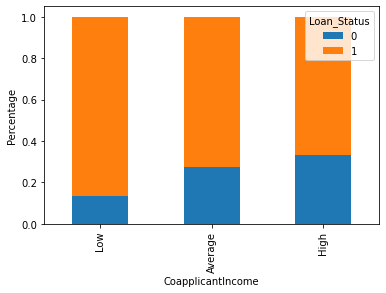

In [40]:
# plot the chart
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [41]:
print(len(train[train["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  len(train[train["CoapplicantIncome"] == 0])/len(train["CoapplicantIncome"])

273


('Percentage of CoapplicantIncome = 0 is:', 0.44462540716612375)

### Q4: We found some mistakes in analyze the Coapplicant income and loan amount, what was the solution?

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant, so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [42]:
# create a new variable
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [43]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

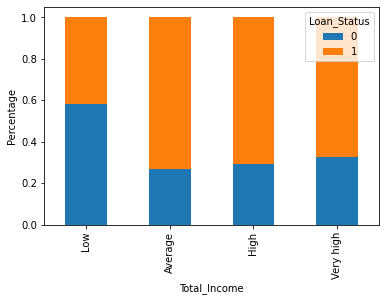

In [44]:
# plot the chart
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income. This is more consistent with our hypothesis with applicants with high income will have more chances of loan approval.

Let’s visualize the Loan amount variable.

In [45]:
# making bins for LoanAmount variable
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

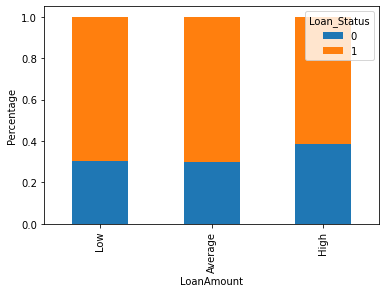

In [46]:
# plot the chart 
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part.

In [47]:
# before dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,High,NaN,5849.0,High,Average
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,High,NaN,6000.0,High,Average


In [48]:
# drop the new variable of bins
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [49]:
# after dropping
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.059187
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.033214
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.022549
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.540556
Loan_Status,-0.004710,-0.059187,-0.033214,-0.022549,0.540556,1.000000


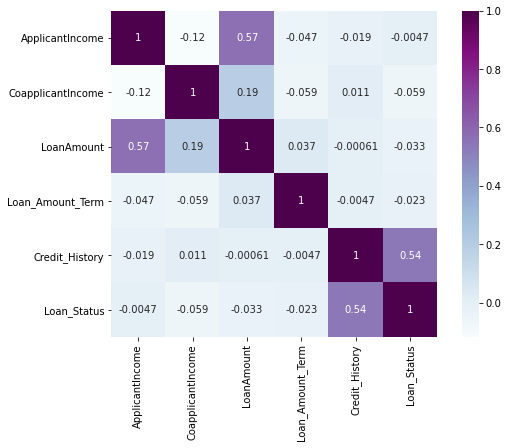

In [50]:
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

### Q5: What were the most correlated variables?

Note: We see that the most correlated variables are

* (ApplicantIncome - LoanAmount) with correlation coefficient of 0.57
* (Credit_History - Loan_Status) with correlation coefficient of 0.54
* LoanAmount is also correlated with CoapplicantIncome with correlation coefficient of 0.19.

## 6. Conclusion

Suggestions for Improvement. There are many things that can be tried to improve the models’ predictions. We can create and add more variables, try different models with different subset of features and/or rows, etc. Some of the ideas are listed below:

* Combine the applicants with 1,2,3 or more dependents and make a new feature as discussed in the EDA part.
* Make independent vs independent variable visualizations to discover some more patterns. 

In summary, this project is helpful to me in understanding how a machine learning competition is approached and what are the steps one should go through to build a robust model. 